Tree Based Models - Q11 - 13/July
===================================
Medical record for 270 patients have been provided in the file 04_heart_disease.xlsx
https://drive.google.com/drive/folders/1Jl8iDu7nGmrqCECbrLqmVafgwE5PYfiU

1) Find out the variable importance using a Decision Tree classifier to predict heart disease. 

2-a) Train a decision tree model to predict heart disease using only the top 5 important variables. Use entire data for training. 

2-b) What is the accuracy of the model with a 5 fold cross validation.

In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read and display the data file
df = pd.read_excel('/Users/riteshturlapaty/ai-ml-learning/AccelerateAI/7.DecisionTree/DailyQuiz/04_heart_disease.xlsx',sheet_name=1)
df.head(5)

,age,sex,chest_pain_type,BP,cholestrol,bloodsugarlevel,ECG_result,Max_heart_rate,Angina,oldpeak,slopepeak,major_vessels,thal,disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              270 non-null    int64  
 1   sex              270 non-null    int64  
 2   chest_pain_type  270 non-null    int64  
 3   BP               270 non-null    int64  
 4   cholestrol       270 non-null    int64  
 5   bloodsugarlevel  270 non-null    int64  
 6   ECG_result       270 non-null    int64  
 7   Max_heart_rate   270 non-null    int64  
 8   Angina           270 non-null    int64  
 9   oldpeak          270 non-null    float64
 10  slopepeak        270 non-null    int64  
 11  major_vessels    270 non-null    int64  
 12  thal             270 non-null    int64  
 13  disease          270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [4]:
heart_data=df
y=df[['disease']]
X=df.drop(['disease'],axis=1)

In [5]:
clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X,y)

[Ellipsis]

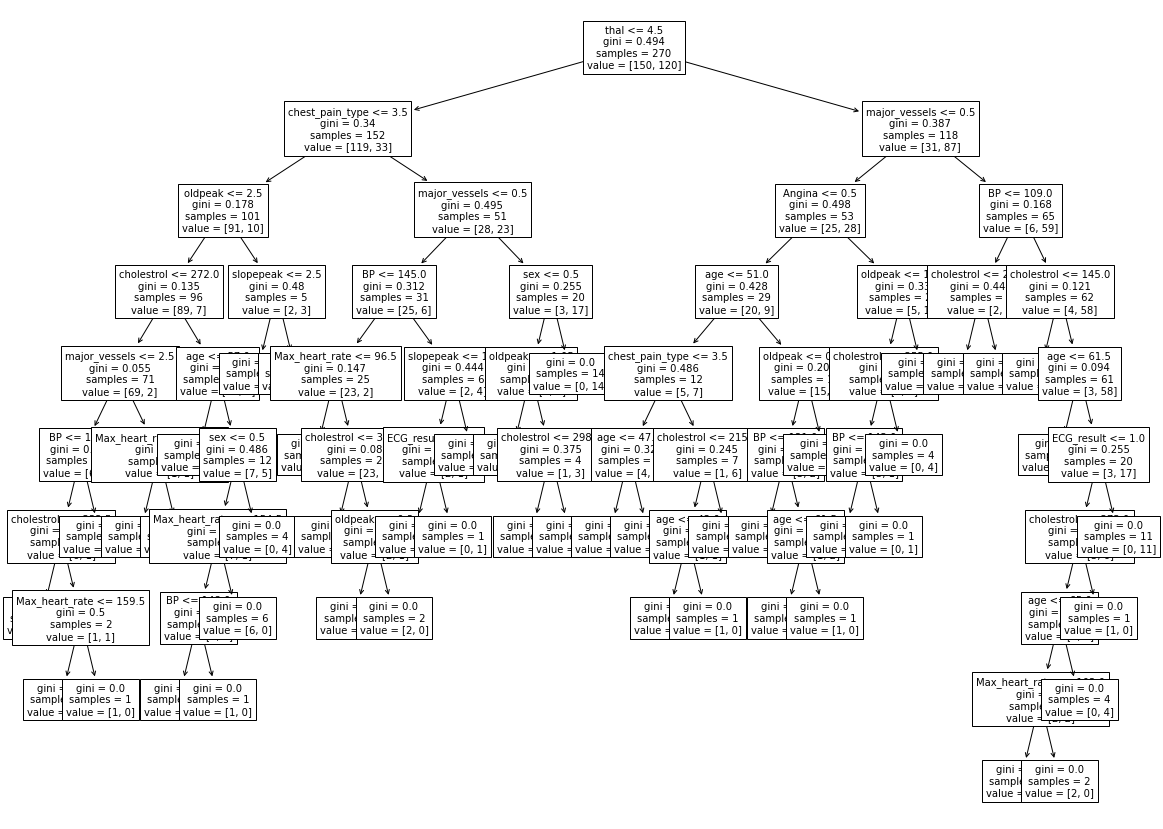

In [6]:
plt.figure(figsize=(20,15))
plot_tree(clf, feature_names=X.columns, fontsize=10)
[...]

In [7]:
# Feature importance
feature_imp = pd.Series(clf.feature_importances_, index=X.columns)
feature_imp.sort_values(ascending=False,inplace=True)
feature_imp

thal               0.269628
major_vessels      0.148487
cholestrol         0.090370
chest_pain_type    0.081865
age                0.080670
oldpeak            0.071400
BP                 0.070469
Max_heart_rate     0.048850
sex                0.046375
Angina             0.045635
slopepeak          0.028000
ECG_result         0.018250
bloodsugarlevel    0.000000
dtype: float64

In [8]:
# Top 5 features
top5_features = list(feature_imp.index[:5])
top5_features

['thal', 'major_vessels', 'cholestrol', 'chest_pain_type', 'age']

In [9]:
# Train the model using only top 5 features
X = df[top5_features]
y = df['disease']

clf2 = DecisionTreeClassifier(criterion='gini')
clf2 = clf2.fit(X,y)

In [10]:
# Accuracy
clf2.score(X,y)*100

100.0

Accuracy of 100% depicts overfitting

### 2-b) What is the accuracy of the model with a 5 fold cross validation.

In [11]:
# Train the model
param_space = {'min_samples_split':list(range(1,40)),
                   'max_depth':list(range(1,40))
                  }

clf = GridSearchCV(DecisionTreeClassifier(), param_space, cv=5)
clf.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 20, 21, 22, 23, 24, 25, 26,
                                               27, 28, 29, 30, ...]})

In [12]:
print(f"Best Train Score is {np.round(clf.best_score_ * 100, 2)}")

Best Train Score is 82.96


With training score of around 82%, lesser than overfitting score of 100%, it shows that cross valiation is critical in training of the model